In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [14]:
# Load the dataset from CSV file
data = pd.read_csv("boston.csv")


In [17]:
# Check the column names
# Display the first few rows to understand the data
print(data.columns)
print(data.head)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505

In [18]:
# Separate features (X) and target variable (y)
# MEDV is the target column: Median value of homes in $1000s
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

In [19]:
# plit the dataset into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Normalize the feature data to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Build linear regression model using DNN
# This is a single Dense layer with 1 unit and no activation — a linear model

model = models.Sequential([
    layers.Dense(1, input_shape=(X_train.shape[1],), activation='linear')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
# - optimizer='adam' uses the Adam optimizer for training
# - loss='mse' uses mean squared error, common for regression problems
# - metrics=['mae'] tracks mean absolute error during training
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [23]:
# Train model
# - epochs=100: Train for 100 iterations over the training data
# - validation_split=0.1: Use 10% of training data for validation
# - verbose=1: Show progress
model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

In [24]:
# Evaluate the model on the test dataset
# This will return the loss and mean absolute error on unseen data

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")


Test MAE: 21.10


In [26]:
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 513.3247 - mae: 21.6768 - val_loss: 525.5759 - val_mae: 21.8520
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 500.7495 - mae: 21.4590 - val_loss: 525.0009 - val_mae: 21.8407
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 543.2410 - mae: 22.1057 - val_loss: 524.4205 - val_mae: 21.8292
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 520.7353 - mae: 21.7968 - val_loss: 523.8411 - val_mae: 21.8178
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 491.3016 - mae: 21.3275 - val_loss: 523.2840 - val_mae: 21.8066
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 509.2725 - mae: 21.5845 - val_loss: 522.7165 - val_mae: 21.7955
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 487.9412 - mae: 21.2315 - val_loss: 522.1575 - val_mae: 21.7842
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 495.9562 - mae: 21.3170 - val_loss: 521.5891 - val_mae: 21.7728
Epoch 9/100
12/

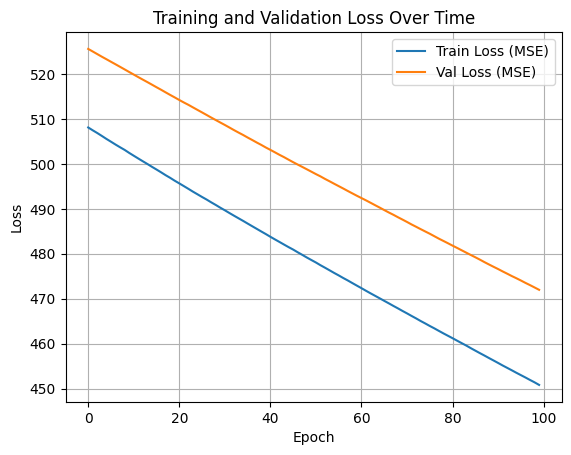

In [27]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()